# **LAB: PyTorch MNIST**

Dong Gyun Ko <br>

Last Updated: March 3, 2023 <br>

# **1. Import the Modules**

In [1]:
# import the modules

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.datasets
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

plt.style.use('default')

# **2. Preprocessing Set**
- `transform.Compose`

In [2]:
# transform

transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5, ), (0.5, ))]) # N(0.5, 0.5^2)

# **3. Load and Check the Data**

In [3]:
# download tha data

# train
trainset = torchvision.datasets.MNIST(root='./data', 
                                      train=True, 
                                      download=True, 
                                      transform=transform)

train_loader = DataLoader(trainset, 
                          batch_size=128, 
                          shuffle=True, 
                          num_workers=2)

# test
testset = torchvision.datasets.MNIST(root='./data', 
                                     train=False, 
                                     download=True, 
                                     transform=transform)

test_loader = DataLoader(testset, 
                         batch_size=128, 
                         shuffle=False, 
                         num_workers=2)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
# check the shape of train data

image, label = next(iter(train_loader))
image.shape, label.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

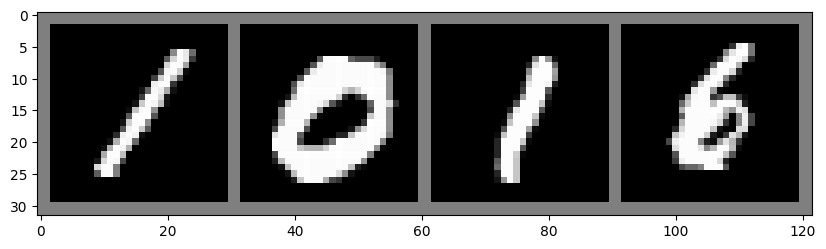

In [5]:
# plot the train data

def imshow(img):
    
    img = img/2 +0.5
    npimg = img.numpy()
    fig = plt.figure(figsize=(10, 5))

    plt.imshow(np.transpose(npimg, (1, 2, 0)))

    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images[:4]))

# **4. Generate the Neural Networks**

In [6]:
# generate the model architecture

class Net(nn.Module):
      
      def __init__(self):

          super(Net, self).__init__()

          self.conv1 = nn.Conv2d(1, 6, 3)
          self.conv2 = nn.Conv2d(6, 16, 3)
          self.fc1 = nn.Linear(16 * 5 * 5, 120)
          self.fc2 = nn.Linear(120, 84)
          self.fc3 = nn.Linear(84, 10)
          
      def forward(self, x):

          x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
          x = F.max_pool2d(F.relu(self.conv2(x)), 2)
          x = x.view(-1, self.num_flat_features(x))
          x = F.relu(self.fc1(x))
          x = F.relu(self.fc2(x))
          x = self.fc3(x)

          return x
      
      def num_flat_features(self, x):

          size = x.size()[1:]
          num_features = 1
          
          for s in size:

              num_features *= s

          return num_features

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [7]:
# check the shape of 1st layer's parameters

params = list(net.parameters())
print(len(params))
print(params[0].size()) # 1st layer

10
torch.Size([6, 1, 3, 3])


In [8]:
# check the forward propagation values (random inputs)

input = torch.randn(1, 1, 28, 28)
out = net(input)
print(out)

tensor([[ 0.0565, -0.0428, -0.1228, -0.0451,  0.0671, -0.0220, -0.0235, -0.1036,
         -0.0405, -0.0164]], grad_fn=<AddmmBackward0>)


# **5. Loss Function and Optimizer**

In [9]:
# loss function and optimizer

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# **6. Train the Model**

- `optimizer.zero_grad` : initialize the gradients of weights

- loss calculation

- `loss.backward()`

- `optmizer.step()` : update

In [10]:
# check the number of batch

total_batch = len(train_loader)
print(total_batch)

469


In [11]:
# train the model

"""
epochs = 3
"""

for epoch in tqdm(range(3)):

    running_loss = 0.0

    for i, data in enumerate(train_loader, 0):

        inputs, labels = data

        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 100 == 99:

           print('Epoch: {}, Iter: {}, Loss: {}'.format(epoch+1, i+1, running_loss/2000))
           
           running_loss = 0.0

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1, Iter: 100, Loss: 0.11509324955940246
Epoch: 1, Iter: 200, Loss: 0.1146701214313507
Epoch: 1, Iter: 300, Loss: 0.11418093550205231
Epoch: 1, Iter: 400, Loss: 0.11347529637813568


 33%|███▎      | 1/3 [00:19<00:38, 19.03s/it]

Epoch: 2, Iter: 100, Loss: 0.11075290966033935
Epoch: 2, Iter: 200, Loss: 0.10560508412122727
Epoch: 2, Iter: 300, Loss: 0.08777888214588166
Epoch: 2, Iter: 400, Loss: 0.05399251452088356


 67%|██████▋   | 2/3 [00:37<00:18, 18.66s/it]

Epoch: 3, Iter: 100, Loss: 0.029968888282775878
Epoch: 3, Iter: 200, Loss: 0.02469861215353012
Epoch: 3, Iter: 300, Loss: 0.021338660329580306
Epoch: 3, Iter: 400, Loss: 0.018249330461025236


100%|██████████| 3/3 [00:55<00:00, 18.52s/it]


# **7. Save and Load the Model**

- `torch.save`
  - save `net.state_dict()`

- `torch.load`
  - load the model as `load_state_dict`

In [12]:
# save the model

PATH = './mnist_net.pth'
torch.save(net.state_dict(), PATH)

In [13]:
# load the model

net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [14]:
# check the parameters

net.parameters

<bound method Module.parameters of Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>

# **8. Test the Model**

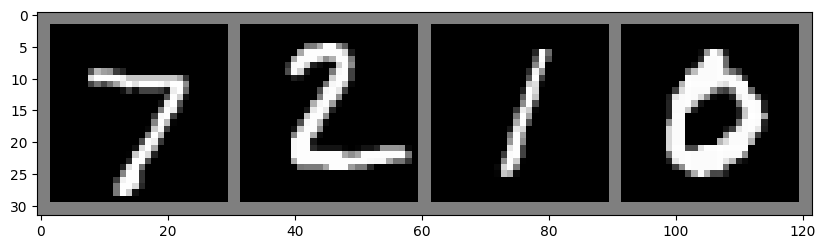

In [15]:
# plot the test data

dataiter = iter(test_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images[:4]))

In [16]:
# predict the test data

outputs = net(images)
_, predicted = torch.max(outputs, 1)

print(predicted)
print(''.join('{}\t'.format(str(predicted[j].numpy())) for j in range(4)))

tensor([7, 2, 1, 0, 4, 1, 4, 9, 2, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 3, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 7, 7, 8, 4, 3, 7, 4, 2, 4, 3, 0, 7, 0,
        2, 9, 1, 7, 3, 7, 8, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 4, 3, 1, 4,
        1, 9, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2,
        5, 4, 7, 6, 4, 9, 0, 5])
7	2	1	0	


In [17]:
# test the model

correct = 0
total = 0

with torch.no_grad():

     for data in test_loader:

         images, labels = data
         
         outputs = net(images)

         _, predicted = torch.max(outputs.data, 1)
         total += labels.size(0)
         correct += (predicted == labels).sum().item()
    
     print('accuracy: ', 100 * correct / total)

accuracy:  90.5


# **9. Set the GPU**

* set the GPU

* make both model and data available by transfering to the GPU through `to` (very important !!)

*  `.cuda()` is possible to load.

In [17]:
# import the modules

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.datasets
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

plt.style.use('default')

In [15]:
# set the GPU

torch.cuda.is_available()

use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

In [16]:
device

device(type='cuda')

In [5]:
# load tha data

# transform
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5, ), (0.5, ))]) # N(0.5, 0.5^2)

# train
trainset = torchvision.datasets.MNIST(root='./data', 
                                      train=True, 
                                      download=True, 
                                      transform=transform)

train_loader = DataLoader(trainset, 
                          batch_size=128, 
                          shuffle=True, 
                          num_workers=2)

# test
testset = torchvision.datasets.MNIST(root='./data', 
                                     train=False, 
                                     download=True, 
                                     transform=transform)

test_loader = DataLoader(testset, 
                         batch_size=128, 
                         shuffle=False, 
                         num_workers=2)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [18]:
# generate the model architecture

class Net(nn.Module):
      
      def __init__(self):

          super(Net, self).__init__()

          self.conv1 = nn.Conv2d(1, 6, 3)
          self.conv2 = nn.Conv2d(6, 16, 3)
          self.fc1 = nn.Linear(16 * 5 * 5, 120)
          self.fc2 = nn.Linear(120, 84)
          self.fc3 = nn.Linear(84, 10)
          
      def forward(self, x):

          x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
          x = F.max_pool2d(F.relu(self.conv2(x)), 2)
          x = x.view(-1, self.num_flat_features(x))
          x = F.relu(self.fc1(x))
          x = F.relu(self.fc2(x))
          x = self.fc3(x)

          return x
      
      def num_flat_features(self, x):

          size = x.size()[1:]
          num_features = 1
          
          for s in size:

              num_features *= s

          return num_features

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [7]:
# transfer the model to the GPU

net = Net().to(device)

In [8]:
# loss function and optimizer

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [9]:
# train the model

for epoch in tqdm(range(3)):

    running_loss = 0.0

    for i, data in enumerate(train_loader, 0):

        inputs, labels = data[0].to(device), data[1].to(device) # transfer to the GPU

        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 100 == 99:

           print('Epoch: {}, Iter: {}, Loss: {}'.format(epoch+1, i+1, running_loss/2000))
           
           running_loss = 0.0

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1, Iter: 100, Loss: 0.11505273926258087
Epoch: 1, Iter: 200, Loss: 0.11476721596717834
Epoch: 1, Iter: 300, Loss: 0.11445609807968139
Epoch: 1, Iter: 400, Loss: 0.11395654571056366


 33%|███▎      | 1/3 [00:24<00:49, 24.93s/it]

Epoch: 2, Iter: 100, Loss: 0.11244202888011932
Epoch: 2, Iter: 200, Loss: 0.11014663958549499
Epoch: 2, Iter: 300, Loss: 0.10430404549837112
Epoch: 2, Iter: 400, Loss: 0.08866448831558228


 67%|██████▋   | 2/3 [00:43<00:21, 21.26s/it]

Epoch: 3, Iter: 100, Loss: 0.04256613859534263
Epoch: 3, Iter: 200, Loss: 0.0304091078042984
Epoch: 3, Iter: 300, Loss: 0.025544204235076903
Epoch: 3, Iter: 400, Loss: 0.02161347012221813


100%|██████████| 3/3 [00:59<00:00, 19.96s/it]


In [10]:
# test the model

correct = 0
total = 0

with torch.no_grad():

     for data in test_loader:

         images, labels = data[0].to(device), data[1].to(device) # transfer to the GPU
         
         outputs = net(images)

         _, predicted = torch.max(outputs.data, 1)
         total += labels.size(0)
         correct += (predicted == labels).sum().item()
    
     print('accuracy: ', 100 * correct / total)

accuracy:  89.4


# **10. References**

[1] [video link](https://www.youtube.com/watch?v=IwLOWwrz26w&list=PL7ZVZgsnLwEEIC4-KQIchiPda_EjxX61r&index=4)